# 1st Assignment : Exploring the Weather in Athens


### Ονοματεπώνυμο : Νίκη Μπούρα

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

# Q1: Obtain the Data

## Α) Διάβασμα βασικού αρχείου και μετατροπή μονάδων μέτρησης
📍 Θα συγκεντρώσουμε τα δεδομένα μας από δύο αρχεία. Το ένα ονομάζεται *athens_data_base.csv* το οποίο είναi το βασικό μας αρχείο και το δεύτερο ονομάζεται *athens.csv* . Ξεκινάμε διαβάζοντας το πρώτο αρχείο το οποίο αποθηκεύουμε σε ένα DataFrame το οποίο ονομάζουμε **weather** και κάνοντας τις απαραίτητες μετατροπές στα δεδομένα του.

In [2]:
base_data_filename = "athens_data_base.csv"
weather= pd.read_csv(base_data_filename)

📍 Πρώτα, **μετατρέπουμε όλες τις θερμοκρασίες από Fahrenheit σε βαθμούς Celsius**. Στη συνέχεια **μετατρέπουμε τα δεδομένα για το percipitation από inches σε milimeters**. Αυτό το κάνουμε διότι θέλουμε να συμπληρώσουμε τα δεδομένα του πρώτου αρχείου με την βοήθεια του δεύτερου οπότε πρέπει οι μονάδες μέτρησης να είναι κοινές.

In [3]:
weather["TAVG"] = (weather.TAVG - 32) * (5/9)

In [4]:
weather["TMAX"] = (weather.TMAX - 32) * (5/9)

In [5]:
weather["TMIN"] = (weather.TMIN - 32) * (5/9)

In [6]:
weather["PRCP"] = weather.PRCP * 25.4

In [7]:
weather

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,NaN,18.333333,10.000000
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,NaN,14.444444,7.222222
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,NaN,15.555556,9.444444
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,NaN,18.888889,7.222222
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.000,NaN,16.666667,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.604,NaN,15.000000,18.333333,11.666667
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.000,NaN,16.111111,20.000000,12.222222
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.000,NaN,16.666667,20.000000,15.000000


## Β) Τα προβλήματα των δεδομένων

Αν παρατηρήσουμε το αρχείο διαπιστώνουμε ότι έχει δύο βασικά προβλήματα.

* Λείπουν ημερομηνίες και τα δεδομένα τους μέσα στον χρόνο 


* Λείπουν δεδομένα για το percipitation στις ήδη υπάρχουσες ημερομηνίες

Στόχος, λοιπόν,  είναι:

**1)** Να συμπληρώσουμε ημερομηνίες και δεδομένα που λείπουν στο χρονικό διάστημα 2010-2020

**2)** Να γεμίσουμε τις τιμές του percipitation τις οποίες μπορούμε, καθώς τα συμπληρωματικά μας δεδομένα αναφέρονται στο χρονικό διάστημα 2010-2020



📍 Διαβάζουμε το δεύτερο αρχείο athens.csv. Από αυτό απομονώνουμε τις στήλες που μας ενδιαφέρουν και τις αποθηκεύουμε σε ένα DataFrame που ονομάζεται **df_athens**. Οι στήλες που θέλουμε να αποθηκεύσουμε από το δεύτερο αρχείο είναι η πρώτη στήλη η οποία περιέχει τις ημερομηνίες , η δεύτερη στήλη η οποία περιέχει τις θερμοκρασίες και η 11η στήλη η οποία περιέχει τις τιμές του percipitation.

In [8]:
second_data_filename = "athens.csv"
df_athens = pd.read_csv(second_data_filename, header=None, usecols=[0,1,10])
df_athens_prcp = pd.read_csv(second_data_filename, header=None, usecols=[0,10])


In [9]:
df_athens.columns= ["date","temp","prcp"]
df_athens


,date,temp,prcp
0,2010-01-01,17.9,0.2
1,2010-01-02,15.6,0.0
2,2010-01-03,13.5,0.0
3,2010-01-04,9.5,0.0
4,2010-01-05,13.4,0.0
...,...,...,...
3647,2019-12-27,10.1,0.0
3648,2019-12-28,8.3,7.2
3649,2019-12-29,6.4,3.4
3650,2019-12-30,4.0,12.4


📍 Κάνουμε μετατροπές στους τύπους των δεδομένων και συγκεκριμένα μετατρέπουμε την στήλη date σε datetime τύπο και την στήλη temp σε numeric τύπο

In [10]:
df_athens['temp'] = pd.to_numeric(df_athens['temp'],errors = 'coerce')

In [11]:
weather["DATE"] = pd.to_datetime(weather["DATE"])
df_athens["date"] = pd.to_datetime(df_athens["date"])

### 1) Συμπληρώνουμε ημερομηνίες και δεδομένα που λείπουν στο χρονικό διάστημα 2010-2020

Ξεκινάμε με το **1ο** task το οποίο είναι να γεμίσουμε το βασικό μας αρχείο με τις ημερομηνίες και τα δεδομένα τους τα οποία λείπουν με την βοήθεια του δεύτερου αρχείου.

Για να το κάνουμε αυτό δημιουργούμε ένα καινούργιο DataFrame, το **not_exist**, το οποίο θα περιέχει τις ημερομηνίες από το Dataframe **df_athens**, του συμπληρωματικού αρχείου, οι οποίες δεν υπάρχουν στο βασικό Dataframe,**weather**. 

Αφού βρούμε τις ημερομηνίες και τα δεδομένα στο διάστημα 2010-2020 τα οποία λείπουν από το weather θα τα κάνουμε append 
και θα δημιουργήσουμε ένα καινούργιο DataFrame,το **weather_df**, το οποίο θα είναι η **ένωση του not_exist και του weather**



In [12]:
not_exist = df_athens.loc[~df_athens['date'].isin(weather['DATE'])]

In [13]:
not_exist.columns= ["DATE","TAVG","PRCP"]
not_exist

,DATE,TAVG,PRCP
876,2012-05-26,21.6,0.0
877,2012-05-27,21.0,0.6
878,2012-05-28,21.7,0.0
881,2012-05-31,21.2,0.0
882,2012-06-01,22.4,0.0
...,...,...,...
2831,2017-10-02,18.7,0.0
2837,2017-10-08,17.8,0.0
2844,2017-10-15,20.4,0.0
2856,2017-10-27,17.8,0.0


In [14]:
weather_df = weather.append(not_exist)

In [15]:
weather_df

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,NaN,18.333333,10.000000
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,NaN,14.444444,7.222222
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,NaN,15.555556,9.444444
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,NaN,18.888889,7.222222
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...,...
2831,NaN,NaN,2017-10-02,0.000,NaN,18.7,NaN,NaN
2837,NaN,NaN,2017-10-08,0.000,NaN,17.8,NaN,NaN
2844,NaN,NaN,2017-10-15,0.000,NaN,20.4,NaN,NaN
2856,NaN,NaN,2017-10-27,0.000,NaN,17.8,NaN,NaN


📍 Σπληρώνουμε τις NaN τιμές που δημιουργήθηκαν στο weather_df με τις κατάλληλες τιμές του **STATION** και **ΝΑΜΕ**

In [16]:
weather_df['STATION'] = weather_df['STATION'].fillna("GR000016716")
weather_df['NAME'] = weather_df['NAME'].fillna("HELLINIKON, GR")
weather_df

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,NaN,18.333333,10.000000
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,NaN,14.444444,7.222222
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,NaN,15.555556,9.444444
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,NaN,18.888889,7.222222
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...,...
2831,GR000016716,"HELLINIKON, GR",2017-10-02,0.000,NaN,18.7,NaN,NaN
2837,GR000016716,"HELLINIKON, GR",2017-10-08,0.000,NaN,17.8,NaN,NaN
2844,GR000016716,"HELLINIKON, GR",2017-10-15,0.000,NaN,20.4,NaN,NaN
2856,GR000016716,"HELLINIKON, GR",2017-10-27,0.000,NaN,17.8,NaN,NaN


📍 Επιπλέον, πρέπει να διορθώσουμε το γεγονός ότι οι ημερομηνίες και τα δεδομένα τους που έλειπαν έγιναν append στο τέλος του DataFrame. Για να το διορθώσουμε αυτό κάνουμε **sort το Dataframe weather_df με βάση την ημερομηνία.**

In [17]:
pd.reset_option("display.max_rows", None )
weather_df.sort_values(by=['DATE'] , inplace= True)
weather_df.reset_index()

,index,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,NaN,18.333333,10.000000
1,1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,NaN,14.444444,7.222222
2,2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,NaN,15.555556,9.444444
3,3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,NaN,18.888889,7.222222
4,4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...,...,...
24099,23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.000,NaN,16.666667,NaN,NaN
24100,23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.604,NaN,15.000000,18.333333,11.666667
24101,23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.000,NaN,16.111111,20.000000,12.222222
24102,23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.000,NaN,16.666667,20.000000,15.000000


### 2) Γεμίζουμε τις τιμές του percipitation στο χρονικό διάστημα 2010-2020

Για να γεμίσουμε τις τιμές του PRCP θα χρησιμοποιήσουμε το DataFrame **df_athens_prcp** το οποίο δημιουργήσαμε παραπάνω.
Παρατηρούμε ότι στο Dataframe **weather** υπάρχουν 478 κενές τιμές του PRCP. Σκοπός, λοιπόν, είναι να συμπληρώσουμε όσες τιμές του PRCP μπορούμε από το df_athens_prcp στο weather_df. Θα διαπιστώσουμε ότι ακόμη και μετά από αυτή τη διαδικασία θα υπάρχουν NaN τιμές του PRCP στο weather_df. Αυτό συμβαίνει διότι τα συμπληρωματικά μας δεδομένα περιορίζονται στο χρονικό διάστημα 2010-2020. 

In [18]:
nan_values_prcp = weather["PRCP"].isna().sum()
nan_values_prcp

478

In [19]:
df_athens_prcp.columns= ["DATE","PRCP"]
df_athens_prcp

,DATE,PRCP
0,2010-01-01,0.2
1,2010-01-02,0.0
2,2010-01-03,0.0
3,2010-01-04,0.0
4,2010-01-05,0.0
...,...,...
3647,2019-12-27,0.0
3648,2019-12-28,7.2
3649,2019-12-29,3.4
3650,2019-12-30,12.4


In [20]:
df_athens_prcp["DATE"] = pd.to_datetime(df_athens_prcp["DATE"])

📍 Βρίσκουμε τις ημερομηνίες στις οποίες το PRCP στο weather_df είναι NaN και τις αποθηκεύουμε σε μία λίστα dates.

Στη συνέχεια θα δημιουργήσουμε ένα Dataframe, το **prcp_df**, το οποίο θα είναι μέρος του df_athens_prcp, και θα περιέχει τις τιμές του PRCP για τις οποίες η ημερομηνία τους υπάρχει στην λίστα dates  που δημιουργήσαμε. 

Με άλλα λόγια, το **prcp_df** θα περιέχει τις τιμές του PRCP τις οποίες μπορούμε και πρέπει να συπληρώσουμε στο weather_df.


In [21]:
dates=weather_df.DATE.loc[weather_df.PRCP.isna()] #dates where prcp is NaN

In [22]:
dates.to_list()

[Timestamp('1960-03-26 00:00:00'),
 Timestamp('1960-05-28 00:00:00'),
 Timestamp('1960-09-24 00:00:00'),
 Timestamp('1961-01-19 00:00:00'),
 Timestamp('1961-04-10 00:00:00'),
 Timestamp('1961-04-22 00:00:00'),
 Timestamp('1961-04-24 00:00:00'),
 Timestamp('1961-12-17 00:00:00'),
 Timestamp('1962-02-15 00:00:00'),
 Timestamp('1962-02-18 00:00:00'),
 Timestamp('1962-02-19 00:00:00'),
 Timestamp('1962-02-28 00:00:00'),
 Timestamp('1962-11-03 00:00:00'),
 Timestamp('1962-11-25 00:00:00'),
 Timestamp('1962-12-29 00:00:00'),
 Timestamp('1963-10-17 00:00:00'),
 Timestamp('1963-11-22 00:00:00'),
 Timestamp('1964-09-22 00:00:00'),
 Timestamp('1965-04-06 00:00:00'),
 Timestamp('1965-05-04 00:00:00'),
 Timestamp('1965-11-15 00:00:00'),
 Timestamp('1965-11-28 00:00:00'),
 Timestamp('1965-12-15 00:00:00'),
 Timestamp('1966-03-21 00:00:00'),
 Timestamp('1966-03-24 00:00:00'),
 Timestamp('1966-04-10 00:00:00'),
 Timestamp('1966-06-03 00:00:00'),
 Timestamp('1966-06-04 00:00:00'),
 Timestamp('1967-02-

In [23]:
prcp_df = df_athens_prcp.loc[df_athens_prcp.DATE.isin(dates),['DATE','PRCP']] 
prcp_df

,DATE,PRCP
0,2010-01-01,0.2
18,2010-01-19,0.0
159,2010-06-09,0.6
344,2010-12-11,1.6
454,2011-03-31,6.2
...,...,...
3182,2018-09-18,0.0
3217,2018-10-23,0.2
3237,2018-11-12,0.0
3414,2019-05-08,0.0


📍 Κάνουμε την αντικατάσταση των τιμών του PRCP από το prcp_df στο weather_df και διαπιστώνουμε ότι οι NaN τιμές μειώθηκαν στις 376

In [24]:
weather_df.loc[weather_df.DATE.isin(prcp_df.DATE), ['PRCP']] = prcp_df['PRCP'].values 

In [25]:
nan_values_prcp = weather_df["PRCP"].isna().sum()
nan_values_prcp

376

⚡ Μετά από τα παραπάνω καταλήγουμε να έχουμε συμπληρώσει το αρχικό μας Dataframe, έχοντας πλέον αποθηκεύσει τα δεδομένα μας στο weather_df

# Q2 : Deviation of Summer Temperatures

Σε αυτό το ερώτημα θα ασχοληθούμε με το να βρούμε τις αποκλήσεις της μέσης θερμοκρασίας των καλοκαιριών στο χρονικό διάστημα 1955-2020 από τον μέσο της χρονικής περιόδου 1974-1999.

Για να το κάνουμε αυτό θα δουλέψουμε με τον εξής τρόπο:

**1)** Υπολογίζουμε την μέση θερμοκρασία καλοκαιριού για κάθε έτος στο χρονικό διάστημα 1955-2020

**2)** Υπολογίζουμε την μέση θερμοκρασία του καλοκαιριού το χρονικό διάστημα 1974-1999

**3)** Υπολογίζουμε την απόκλιση κάθε έτους (1955-2020) από τον παραπάνω μέσο

**4)** Υπολογίζουμε τον rolling average των αποκλίσεων από τον μέσο με window size 10.

### 1) Υπολογίζουμε την μέση θερμοκρασία καλοκαιριού για κάθε έτος στο χρονικό διάστημα 1955-2020






📍 Δημιουργούμε ένα καινούργιο Dataframe, το **summer_weather**, το οποίο είναι υποσύνολο του weather_df αλλά περιέχει **μόνο τους καλοκαιρινούς μήνες** για κάθε έτος. Σε αυτό προσθέτουμε τις στήλες month και year τις οποίες ξεχωρίζουμε από την στήλη DATE.


In [26]:
months=[6,7,8]

In [27]:
summer_weather = weather_df.loc[pd.DatetimeIndex(weather_df['DATE']).month.isin(months)]

In [28]:
summer_weather

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
151,GR000016716,"HELLINIKON, GR",1955-06-01,0.0,NaN,NaN,26.111111,17.777778
152,GR000016716,"HELLINIKON, GR",1955-06-02,0.0,NaN,NaN,26.666667,17.222222
153,GR000016716,"HELLINIKON, GR",1955-06-03,0.0,NaN,NaN,26.111111,17.222222
154,GR000016716,"HELLINIKON, GR",1955-06-04,0.0,NaN,NaN,26.666667,18.888889
155,GR000016716,"HELLINIKON, GR",1955-06-05,0.0,NaN,NaN,27.222222,17.777778
...,...,...,...,...,...,...,...,...
23124,GR000016716,"HELLINIKON, GR",2020-08-27,0.0,NaN,28.333333,34.444444,23.333333
23125,GR000016716,"HELLINIKON, GR",2020-08-28,0.0,NaN,29.444444,35.555556,22.222222
23126,GR000016716,"HELLINIKON, GR",2020-08-29,0.0,NaN,29.444444,35.555556,22.777778
23127,GR000016716,"HELLINIKON, GR",2020-08-30,0.0,NaN,27.777778,34.444444,22.222222


In [29]:
summer_weather["month"] = pd.DatetimeIndex(summer_weather['DATE']).month

C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
summer_weather["year"] = pd.DatetimeIndex(summer_weather['DATE']).year

C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
summer_weather

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,month,year
151,GR000016716,"HELLINIKON, GR",1955-06-01,0.0,NaN,NaN,26.111111,17.777778,6,1955
152,GR000016716,"HELLINIKON, GR",1955-06-02,0.0,NaN,NaN,26.666667,17.222222,6,1955
153,GR000016716,"HELLINIKON, GR",1955-06-03,0.0,NaN,NaN,26.111111,17.222222,6,1955
154,GR000016716,"HELLINIKON, GR",1955-06-04,0.0,NaN,NaN,26.666667,18.888889,6,1955
155,GR000016716,"HELLINIKON, GR",1955-06-05,0.0,NaN,NaN,27.222222,17.777778,6,1955
...,...,...,...,...,...,...,...,...,...,...
23124,GR000016716,"HELLINIKON, GR",2020-08-27,0.0,NaN,28.333333,34.444444,23.333333,8,2020
23125,GR000016716,"HELLINIKON, GR",2020-08-28,0.0,NaN,29.444444,35.555556,22.222222,8,2020
23126,GR000016716,"HELLINIKON, GR",2020-08-29,0.0,NaN,29.444444,35.555556,22.777778,8,2020
23127,GR000016716,"HELLINIKON, GR",2020-08-30,0.0,NaN,27.777778,34.444444,22.222222,8,2020


📍 Κάνουμε **group by** τα δεδομένα μας **κατά year και month** και βρίσκουμε την μέση θερμοκρασία κάθε καλοκαιρινού μήνα για κάθε έτος. 

Στη συνέχεια ξανακάνουμε **group by κατά έτος** και βρίσκουμε την μέση θερμοκρασία καλοκαιριού για κάθε έτος.

In [32]:
avg_summer_weather = summer_weather.groupby(['year','month']).mean()['TAVG'].to_frame()


In [33]:
avg_summer_weather

TAVG
year month           
1955 6            NaN
     7            NaN
     8            NaN
1956 6            NaN
     7            NaN
...               ...
2019 7      28.154122
     8      29.408602
2020 6      24.666667
     7      28.584229
     8      28.781362

[198 rows x 1 columns]

In [34]:
final_avg_summer_weather = avg_summer_weather.groupby(['year']).mean()['TAVG'].to_frame()

In [35]:
final_avg_summer_weather

,TAVG
year,
1955,NaN
1956,NaN
1957,28.100358
1958,27.014337
1959,NaN
...,...
2016,28.160693
2017,28.050418
2018,27.392473


### 2) Υπολογίζουμε την μέση θερμοκρασία καλοκαιριού κατά το χρονικό διάστημα 1974-1999

📍 Απομονώνουμε από το παραπάνω Dataframe, final_avg_summer_weather, τις θερμοκρασίες που αφορούν τα έτη από το 1974-1999 και βρίσκουμε τον αριθμητικό μέσο τους.

In [36]:
baseline = final_avg_summer_weather.loc[(final_avg_summer_weather.index >1973) & (final_avg_summer_weather.index <2000)].mean(axis=0)

In [37]:
baseline

TAVG    26.211045
dtype: float64

### 3) Υπολογίζουμε την απόκλιση κάθε έτους (1955-2020) από τον παραπάνω μέσο

📍 Αποθηκεύουμε το αποτέλεσμα σε ξεχωριστή στήλη, **DEV**, στο final_avg_summer_weather Dataframe. Κάποιες τιμές της στήλης DEV είναι NaN καθώς υπήρχαν NaN τιμές στην στήλη TAVG. Συμπληρώνουμε τις NaN  τιμές της στήλης DEV με 0 για να υπολογίσουμε τον rolling average.

In [38]:
final_avg_summer_weather['DEV'] = final_avg_summer_weather['TAVG'] - baseline["TAVG"]

In [39]:
final_avg_summer_weather["DEV"] = final_avg_summer_weather["DEV"].fillna(value = 0)

### 4) Υπολογίζουμε τον rolling average των αποκλίσεων από τον μέσο με window size 10

In [40]:
final_avg_summer_weather['ROLL_AVG'] = final_avg_summer_weather["DEV"].rolling(10).mean()

In [41]:
final_avg_summer_weather

,TAVG,DEV,ROLL_AVG
year,,,
1955,NaN,0.000000,NaN
1956,NaN,0.000000,NaN
1957,28.100358,1.889313,NaN
1958,27.014337,0.803292,NaN
1959,NaN,0.000000,NaN
...,...,...,...
2016,28.160693,1.949648,1.946658
2017,28.050418,1.839373,1.930473
2018,27.392473,1.181428,1.854467


⚡ Μετά από τα παραπάνω θα εμφανήσουμε ένα διάγραμμα χρησιμοποιώντας τις τιμές του **final_avg_summer_weather**.

Χωρίζουμε το παραπάνω DataFrame σε θετικές και αρνητικές τιμές της στήλης DEV για να τα κάνουμε plot με διαφορετικό χρώμα.

Στην συνέχεια προσθέτουμε στο διάγραμμα τον rolling average. Παρατηρούμε η γραφική παράσταση του rolling average ξεκινάει από το έτος 1964. Αυτό συμβαίνει διότι ο rolling average υπολογίζεται με βάση τα 10 τελευταία χρόνια, οπότε αφήνει NaN τις πρώτες 9 τιμές.

In [42]:
above = final_avg_summer_weather.loc[final_avg_summer_weather.DEV >0]

In [43]:
under = final_avg_summer_weather.loc[final_avg_summer_weather.DEV <0]

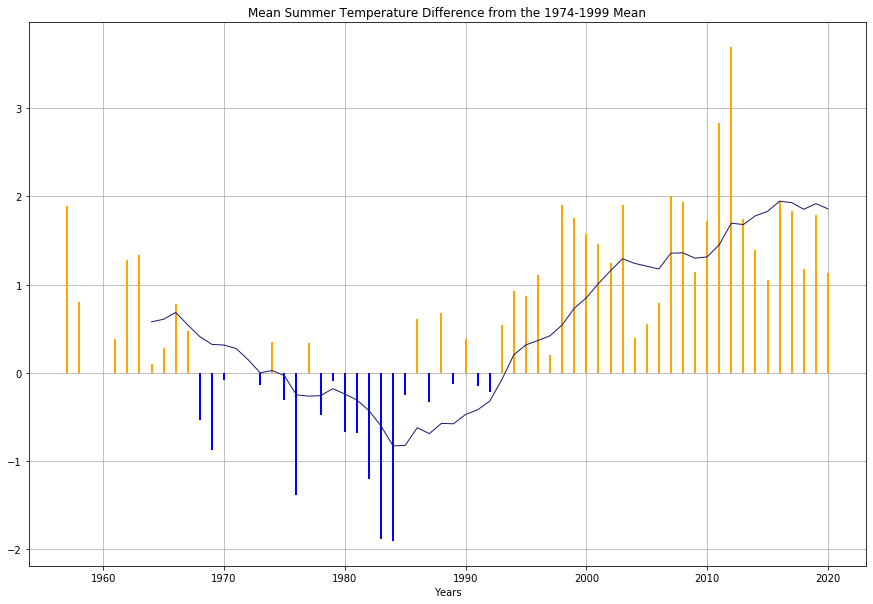

In [44]:
fig1 = plt.figure(figsize=(15,10))
ax1 = plt.axes()
plt.grid(True)

x = final_avg_summer_weather.index

ax1.set_title("Mean Summer Temperature Difference from the 1974-1999 Mean")
ax1.set_xlabel('Years')

ax1.vlines(x=above.index, ymin=0, ymax=above.DEV, color='orange', linewidth=2)
ax1.vlines(x=under.index, ymin=0, ymax=under.DEV, color='blue', linewidth=2)

ax1.plot(final_avg_summer_weather.index,final_avg_summer_weather.ROLL_AVG , color='midnightblue' , linewidth=1)



💡 Παρατηρούμε ότι οι αποκλήσεις με βάση την μέση θερμοκρασία του 1974-1999 είναι σχετικά χαμηλές μέχρι το χρονικό διάστημα 1993. Μετά από αυτό παρουσιάζουν σε γενικές γραμμές ανοδική πορεία με κορύφωση το έτος 2012 το οποίο ήταν πράγματι το πιο θερμό καλοκαίρι που έχουμε βιώσει μέχρι στιγμής. Ενδιαφέρον, επίσης, παρουσιάζει η μελέτη του διαγράμματος ανα δεκαετίες. Είναι γνωστό ότι η περίοδος 2011-2020 ήταν η θερμότερη δεκαετία που έχει καταγραφεί ποτέ. Αυτό φαίνεται ξεκάθαρα από το διάγραμμα καθώς την τελευταία δεκαετία παρατηρούνται συνολικά οι μεγαλύτερες αποκλίσεις σε σχέση με τις υπόλοιπες.

# Q3:Evolution of Daily Temperatures

Στο ερώτημα αυτό θα ασχοληθούμε με το να βρούμε την μέση ημερίσια θερμοκρασία κάθε έτους στο χρονικό διάστημα 1955-2020. Κάθε γραμμή που θα αναπαραστήσουμε στο διάγραμμα αφορά κάθε ένα από τα έτη του παραπάνω χρονικού διαστήματος. Επιπλέον, θα αναπαραστήσουμε την μέση ημερίσια θερμοκρασία του χρονικού διαστήματος 1974-1999. Κάθε γραμμή που θα αναπαραστήσουμε θα έχει εξομαλυνθεί με την χρήση του rolling average για 30 ημέρες.

Για να το κάνουμε αυτό θα δουλέψουμε με τον εξής τρόπο:

**1)** Βρίσκουμε για κάθε έτος στο χρονικό διάστημα 1955-2020 την μέση ημερίσια θερμοκρασία

**2)** Υπολογίζουμε την rolling average 30 ημερών για κάθε έτος

**3)** Περνάμε τα δεδομένα μας σε ένα pivot table το οποίο θα μας βοηθήσει στην αναπαράσταση


### 1) Βρίσκουμε για κάθε έτος στο χρονικό διάστημα 1955-2020 την μέση ημερίσια θερμοκρασία

📍 Η μέση ημερίσια θερμοκρασία κάθε έτους είναι αποθηκεύμενη στο weather_df. Από αυτό λοιπόν απομονώνουμε τις στήλες που μας ενδιαφέρουν και τις αποθηκεύουμε σε ένα νέο DataFrame, το **daily_average**. Σε αυτό προσθέτουμε επίσης τις στήλες **months** , **day** και **month_day**.

In [45]:
pd.reset_option('display.max_rows', None)
daily_average = weather_df[['DATE','TAVG']]

In [46]:
daily_average

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
23246,2020-12-27,16.666667
23247,2020-12-28,15.000000
23248,2020-12-29,16.111111
23249,2020-12-30,16.666667


In [47]:
daily_average["DATE"] = pd.to_datetime(daily_average["DATE"])
daily_average["year"] = pd.DatetimeIndex(daily_average['DATE']).year

C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
daily_average["months"] = pd.DatetimeIndex(daily_average['DATE']).month
daily_average["day"] = pd.DatetimeIndex(daily_average['DATE']).day
daily_average['month_day'] = daily_average.DATE.dt.strftime('%m-%d')


C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [49]:
daily_average

,DATE,TAVG,year,months,day,month_day
0,1955-01-01,NaN,1955,1,1,01-01
1,1955-01-02,NaN,1955,1,2,01-02
2,1955-01-03,NaN,1955,1,3,01-03
3,1955-01-04,NaN,1955,1,4,01-04
4,1955-01-05,NaN,1955,1,5,01-05
...,...,...,...,...,...,...
23246,2020-12-27,16.666667,2020,12,27,12-27
23247,2020-12-28,15.000000,2020,12,28,12-28
23248,2020-12-29,16.111111,2020,12,29,12-29
23249,2020-12-30,16.666667,2020,12,30,12-30


📍 Στο χρονικό διάστημα 1955-2020 υπάρχουν αρκετά **δίσεκτα έτη**, δηλαδή έτη τα οποία έχουν δεδομένα για την 29η του Φεβρουαρίου. Επειδή όμως τα περισσότερα έτη στα δεδομένα μας δεν είναι δίσεκτα , εαν κρατήσουμε τα δεδομένα για τα δίσεκτα έτη για κάθε 29η του Φεβρουαρίου, στο διάγραμμα μας θα εμφανίζεται μία κενή περιοχή η οποία θα αντιστοιχεί σε αυτή την ημερομηνία. 
Για αυτόν τον λόγο παρακάτω εντοπίζουμε τα δίσεκτα έτη και αφαιρούμε τα δεδομένα για κάθε 29 του Φεβρουαρίου.

In [50]:
daily_average.drop(daily_average[(daily_average.year % 4 == 0 ) & (daily_average.months == 2) & (daily_average.day == 29)].index, inplace=True)

C:\Users\takis\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 1) Υπολογίζουμε την rolling average 30 ημερών για κάθε έτος

📍 Αντικαθιστούμε την στήλη TAVG με τις τιμές του rolling average 30 μερών για κάθε έτος. 

In [51]:
daily_average['TAVG'] = daily_average['TAVG'].rolling(30).mean()

C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
daily_average

,DATE,TAVG,year,months,day,month_day
0,1955-01-01,NaN,1955,1,1,01-01
1,1955-01-02,NaN,1955,1,2,01-02
2,1955-01-03,NaN,1955,1,3,01-03
3,1955-01-04,NaN,1955,1,4,01-04
4,1955-01-05,NaN,1955,1,5,01-05
...,...,...,...,...,...,...
23246,2020-12-27,14.092593,2020,12,27,12-27
23247,2020-12-28,14.166667,2020,12,28,12-28
23248,2020-12-29,14.166667,2020,12,29,12-29
23249,2020-12-30,14.222222,2020,12,30,12-30


### 3) Περνάμε τα δεδομένα μας σε ένα pivot table το οποίο θα μας βοηθήσει στην αναπαράσταση

📍 Δημιουργούμε ένα pivot table στο οποίο θέτουμε ως index τις τιμές μήνα-ημέρας του έτους και ως στήλες τα έτη από το 1955 εως και το 2020. Οι τιμές του pivot table αντιστοιχούν στην στήλη TAVG , η οποία πλέον περιέχει τις τιμές του rolling average 30 ημερών για κάθε έτος.

In [53]:
pivot_last = daily_average.pivot(index="month_day", columns="year", values="TAVG")

In [54]:
pivot_last.index.name = 'DATE'

In [55]:
pivot_last

year,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DATE,,,,,,,,,,,,,,,,,,,,,
01-01,NaN,NaN,NaN,11.500000,NaN,NaN,NaN,12.333333,11.537037,13.425926,...,13.111111,12.666667,11.311852,10.473333,12.629630,10.833333,8.962963,11.944444,10.666667,12.333333
01-02,NaN,NaN,NaN,11.759259,NaN,NaN,NaN,12.259259,11.611111,13.425926,...,12.833333,12.537037,11.181852,10.516667,12.111111,10.611111,8.777778,11.796296,10.555556,12.111111
01-03,NaN,NaN,NaN,12.018519,NaN,NaN,NaN,12.296296,11.685185,13.333333,...,12.555556,12.388889,11.211852,10.620000,11.740741,10.555556,8.703704,11.685185,10.407407,11.981481
01-04,NaN,NaN,NaN,12.259259,NaN,NaN,NaN,12.203704,11.907407,13.129630,...,12.444444,12.222222,11.185185,10.676667,11.574074,10.611111,8.703704,11.629630,10.166667,11.962963
01-05,NaN,NaN,NaN,12.351852,NaN,NaN,NaN,12.018519,12.092593,12.833333,...,12.370370,11.981481,11.138519,10.713333,11.222222,10.777778,8.814815,11.703704,9.981481,11.907407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,NaN,NaN,10.703704,12.962963,NaN,NaN,12.759259,11.537037,14.129630,13.537037,...,13.018519,12.320000,10.783333,14.037037,11.833333,9.962963,12.629630,10.944444,13.870370,14.092593
12-28,NaN,NaN,10.648148,12.962963,NaN,NaN,12.740741,11.500000,13.944444,13.481481,...,12.981481,12.180000,10.853333,13.981481,11.722222,9.703704,12.685185,10.685185,13.574074,14.166667
12-29,NaN,NaN,10.629630,13.055556,NaN,NaN,12.740741,11.370370,13.722222,13.277778,...,12.796296,11.943333,10.910000,13.907407,11.611111,9.444444,12.703704,10.703704,13.129630,14.166667


### 4) Βρίσκουμε τη μέση ημερίσια θερμοκρασία για τα έτη 1974-1999 ( baseline )

In [56]:
q3_baseline = daily_average.loc[(daily_average.year > 1973) & (daily_average.year < 2000)]

In [57]:
q3_baseline

,DATE,TAVG,year,months,day,month_day
6940,1974-01-01,13.074074,1974,1,1,01-01
6941,1974-01-02,13.129630,1974,1,2,01-02
6942,1974-01-03,13.092593,1974,1,3,01-03
6943,1974-01-04,12.944444,1974,1,4,01-04
6944,1974-01-05,12.814815,1974,1,5,01-05
...,...,...,...,...,...,...
16431,1999-12-27,13.314815,1999,12,27,12-27
16432,1999-12-28,13.537037,1999,12,28,12-28
16433,1999-12-29,13.666667,1999,12,29,12-29
16434,1999-12-30,13.740741,1999,12,30,12-30


📍 Έχοντας αντικαταστήσει παραπάνω την στήλη TAVG με τον rolling average των 30 ημερών για να βρούμε το baseline μένει να κάνουμε group by το month_day και να βρούμε την μέση τιμή των θερμοκρασιών για κάθε ημέρα του μήνα.

In [58]:
q3_baseline_grouped = q3_baseline.groupby([ 'month_day']).mean()['TAVG'].to_frame()

In [59]:
q3_baseline_grouped

,TAVG
month_day,
01-01,11.266382
01-02,11.220798
01-03,11.162393
01-04,11.070513
01-05,10.984330
...,...
12-27,11.620370
12-28,11.528490
12-29,11.450855


⚡ Μετά από τα παραπάνω θα εμφανίσουμε διαγραμματικά το pivot table **pivot_last** . Με την βοήθεια του seaborn καθορίζουμε μία χρωματική παλέττα η οποία ξεκινάει από ανοιχτό και καταλήγει σε έντονο πορτοκαλί,ώστε οι γραμμές κάθε έτους να εμφανίζονται με όλο και πιο σκούρο χρώμα. 

C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


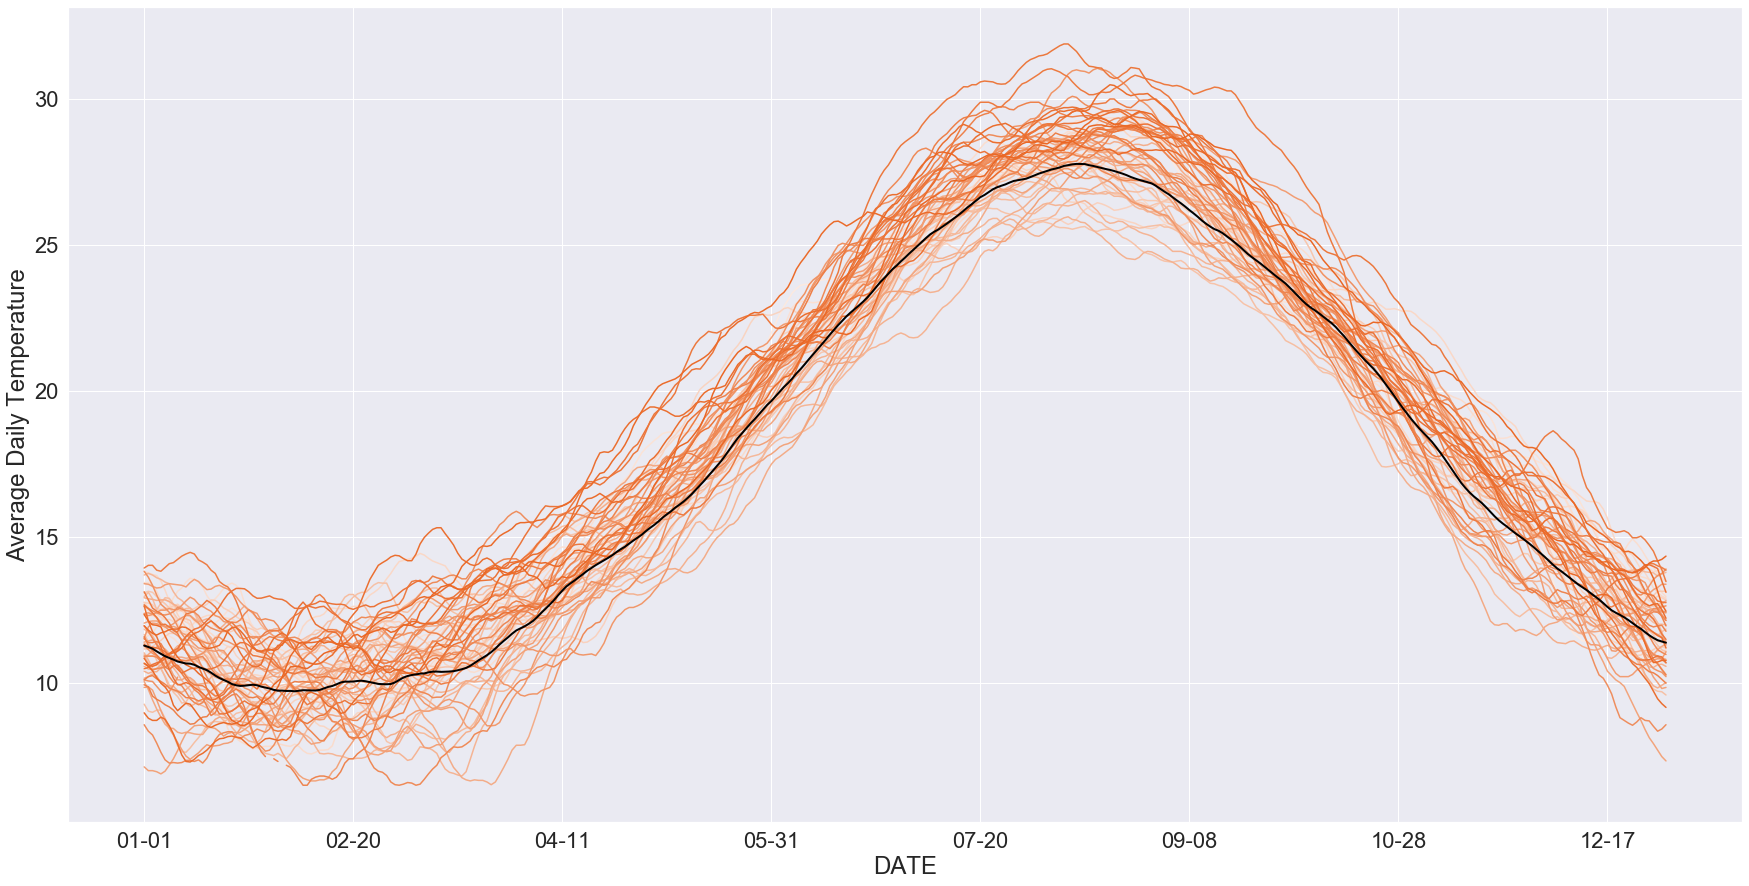

In [60]:
sns.set(rc = {'figure.figsize':(30,15)})
sns.set()  # use Seaborn styles
my_cmap = sns.light_palette( '#EA6725' , as_cmap=True)
sns.set(font_scale = 2)
fig = pivot_last.plot( cmap=my_cmap )
plt.xlabel("DATE")
plt.ylabel("Average Daily Temperature")
fig.legend_.remove()
axes = plt.axes()
axes.plot(q3_baseline_grouped.index,q3_baseline_grouped['TAVG'], color='black' , linewidth=2)
plt.show(fig)



💡 Στο διάγραμμα αυτό παρατηρούμε ότι όσο τα χρόνια αυξάνονται, δηλαδή όσο πιο έντονο γίνεται το πορτοκαλί χρώμα, τόσο περισσότερο αυξάνεται η ημερίσια θερμοκρασία. Παρατηρούμε ότι τό φαινόμενο αυτό δεν αφορά μόνο το καλοκαίρι, όπως διαπιστώσαμε και στο προηγούμενο ερώτημα, αλλά όλους τους μήνες του χρόνου. Επιπλέον, παρατηρούμε ότι οι πιο έντονες πορτοκαλί γραμμές , δηλαδή τα τελευταία χρόνια, οι ημερίσιες θερμοκρασίες είναι πάνω από τον baseline των ετών 1974-1999.

# Q4: Extreme Temperature Events

Στο ερώτημα αυτό θα ασχοληθούμε με το να εντοπίσουμε το ποσοστό των ακραίων καιρικών φαινομένων κάθε έτους. Το ποσοστό αυτό θα υπολογιστεί με βάση το baseline της χρονικής περιόδου 1974-1999 . Με βάση αυτό, λοιπόν, θα ορίσουμε ως **ακραία καιρικά φαινόμενα** τις θερμοκρασίες που ξεπερνούν το baseline κατά 10%. Η παρακάτω λύση η οποία αφορά αυτό το ερώτημα έγινε με την χρήση μέσων μηνιαίων θερμοκρασιών τόσο για το baseline όσο και για κάθε έτος ξεχωριστά.

Για να το κάνουμε αυτό θα δουλέψουμε με τον εξής τρόπο:

**1)** Βρίσκουμε την μέση μηνιαία θερμοκρασία των ετών 1974-1999.

**2)** Βρίσκουμε την μέση μηνιαία θερμοκρασία για κάθε ένα από τα έτη 1955-2020

**3)** Μετασχηματίζουμε την μορφή των δεδομένων για τα έτη 1955-2020

**4)** Κάνουμε τους απαραίτητους υπολογισμούς ώστε να μετρήσουμε πόσα αρκαία καιρικά φαινόμενα υπάρχουν σε κάθε έτος και να βρούμε το ποσοστό τους.



### 1) Βρίσκουμε την μέση μηνιαία θερμοκρασία των ετών 1974-1999.

📍 Απομονώνουμε σε ένα καινούργιο DataFrame, το **df_baseline**, τα δεδομένα του χρονικού διαστήματος 1974-1999.

Στην συνέχεια, κάνοντας group by ανά μήνα βρίσκουμε την μέση θερμοκρασία για κάθε μήνα σε αυτό το χρονικό διάστημα. Την πληροφορία αυτή την αποθηκεύουμε σε ένα καινούργιο DataFrame το οποίο ονομάζουμε **baseline_grouped**.

In [61]:
pd.reset_option("display.max_rows")
df_baseline = daily_average.loc[(daily_average.year > 1973) & (daily_average.year < 2000)]

In [62]:
df_baseline

,DATE,TAVG,year,months,day,month_day
6940,1974-01-01,13.074074,1974,1,1,01-01
6941,1974-01-02,13.129630,1974,1,2,01-02
6942,1974-01-03,13.092593,1974,1,3,01-03
6943,1974-01-04,12.944444,1974,1,4,01-04
6944,1974-01-05,12.814815,1974,1,5,01-05
...,...,...,...,...,...,...
16431,1999-12-27,13.314815,1999,12,27,12-27
16432,1999-12-28,13.537037,1999,12,28,12-28
16433,1999-12-29,13.666667,1999,12,29,12-29
16434,1999-12-30,13.740741,1999,12,30,12-30


In [63]:
df_baseline['month_day'] = df_baseline.DATE.dt.strftime('%m-%d')
df_baseline

C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,TAVG,year,months,day,month_day
6940,1974-01-01,13.074074,1974,1,1,01-01
6941,1974-01-02,13.129630,1974,1,2,01-02
6942,1974-01-03,13.092593,1974,1,3,01-03
6943,1974-01-04,12.944444,1974,1,4,01-04
6944,1974-01-05,12.814815,1974,1,5,01-05
...,...,...,...,...,...,...
16431,1999-12-27,13.314815,1999,12,27,12-27
16432,1999-12-28,13.537037,1999,12,28,12-28
16433,1999-12-29,13.666667,1999,12,29,12-29
16434,1999-12-30,13.740741,1999,12,30,12-30


In [64]:
baseline_grouped =df_baseline.groupby(['months']).mean()['TAVG'].to_frame()

In [65]:
baseline_grouped

,TAVG
months,
1,10.417068
2,9.869547
3,10.623932
4,13.545014
5,17.242558
6,22.094467
7,26.081761
8,27.504110
9,25.375012


## 2) Βρίσκουμε την μέση μηνιαία θερμοκρασία για κάθε ένα από τα έτη 1955-2020

📍 Στη συνέχεια στόχος μας είναι να βρούμε για κάθε έτος 1955-2020 την μέση θερμοκρασία για κάθε μήνα.

Για να το κάνουμε αυτό, κάνουμε group by το daily_average, το οποίο περιέχει τα δεδομένα για όλα τα χρόνια, ως προς year και months. Τα δεδομένα αυτά τα αποθηκεύουμε σε ένα νέο DataFrame, το **extreme_temp**.


In [66]:
daily_average

,DATE,TAVG,year,months,day,month_day
0,1955-01-01,NaN,1955,1,1,01-01
1,1955-01-02,NaN,1955,1,2,01-02
2,1955-01-03,NaN,1955,1,3,01-03
3,1955-01-04,NaN,1955,1,4,01-04
4,1955-01-05,NaN,1955,1,5,01-05
...,...,...,...,...,...,...
23246,2020-12-27,14.092593,2020,12,27,12-27
23247,2020-12-28,14.166667,2020,12,28,12-28
23248,2020-12-29,14.166667,2020,12,29,12-29
23249,2020-12-30,14.222222,2020,12,30,12-30


In [67]:
daily_average['month_day'] = daily_average.DATE.dt.strftime('%m-%d')
daily_average

C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,TAVG,year,months,day,month_day
0,1955-01-01,NaN,1955,1,1,01-01
1,1955-01-02,NaN,1955,1,2,01-02
2,1955-01-03,NaN,1955,1,3,01-03
3,1955-01-04,NaN,1955,1,4,01-04
4,1955-01-05,NaN,1955,1,5,01-05
...,...,...,...,...,...,...
23246,2020-12-27,14.092593,2020,12,27,12-27
23247,2020-12-28,14.166667,2020,12,28,12-28
23248,2020-12-29,14.166667,2020,12,29,12-29
23249,2020-12-30,14.222222,2020,12,30,12-30


In [68]:
extreme_temp = daily_average.groupby(['year','months']).mean()['TAVG'].to_frame()

In [69]:
# pd.set_option('display.max_rows', None)
extreme_temp

TAVG
year months           
1955 1             NaN
     2             NaN
     3             NaN
     4             NaN
     5             NaN
...                ...
2020 8       28.812425
     9       27.965432
     10      23.536440
     11      18.095679
     12      14.345878

[792 rows x 1 columns]

In [70]:
baseline_grouped

,TAVG
months,
1,10.417068
2,9.869547
3,10.623932
4,13.545014
5,17.242558
6,22.094467
7,26.081761
8,27.504110
9,25.375012


### 3) Μετασχηματίζουμε την μορφή των δεδομένων για τα έτη 1955-2020

📍 Μετασχηματίζουμε την μορφή του DataFrame extreme_temp ώστε να καταλήξουμε σε ένα DataFrame , το **final_transposed**, το οποίο θα έχει για στήλες το κάθε έτος στο διάστημα 1955-2020 και για γραμμές τους μήνες του έτους. Οι τιμές του final_transposed θα αποτελούνται από την μέση θερμοκρασία κάθε μήνα για κάθε έτος.

In [71]:
stacked = extreme_temp.stack(0,dropna = False).swaplevel(0,1).sort_index()

In [72]:
stacked

months  year      
1       1955  TAVG          NaN
        1956  TAVG          NaN
        1957  TAVG          NaN
        1958  TAVG    11.483871
        1959  TAVG          NaN
                        ...    
12      2016  TAVG    12.125448
        2017  TAVG    14.051971
        2018  TAVG    12.833333
        2019  TAVG    15.220430
        2020  TAVG    14.345878
Length: 792, dtype: float64

In [73]:
final = pd.DataFrame()

final['Jan'] =stacked[1] 
final['Feb'] =stacked[2] 
final['Mar'] =stacked[3] 
final['Apr'] =stacked[4]
final['May'] =stacked[5]
final['Jun'] =stacked[6]
final['Jul'] =stacked[7]
final['Aug'] =stacked[8]
final['Sep'] =stacked[9]
final['Oct'] =stacked[10]
final['Nov'] =stacked[11]
final['Dec'] =stacked[12]


In [74]:
final

,,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,,
1955,TAVG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956,TAVG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,TAVG,NaN,NaN,NaN,NaN,NaN,NaN,27.648148,28.231780,26.508025,22.567503,18.243210,11.866786
1958,TAVG,11.483871,10.400132,12.803465,14.459259,18.243728,23.771605,26.352449,28.404421,25.448765,21.486858,17.030864,13.121864
1959,TAVG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,TAVG,11.213859,11.889907,14.380920,16.459259,19.584229,23.846914,28.354241,29.341697,26.634568,22.094385,17.441975,12.125448
2017,TAVG,8.054361,9.310185,12.846476,15.654741,19.724886,22.581148,27.985066,29.711888,27.734272,22.566416,17.546667,14.051971
2018,TAVG,11.554958,11.486111,13.724612,16.787037,21.381720,25.197531,26.728196,28.284349,27.043062,21.196201,17.780247,12.833333


In [75]:
final = final.reset_index(level=[1])

In [76]:
del final["level_1"]

In [77]:
final_transposed = final.T

In [78]:
final_transposed

year,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Jan,NaN,NaN,NaN,11.483871,NaN,NaN,10.907407,11.810036,12.564516,10.448626,...,12.025687,10.324970,10.885388,12.041505,10.228793,11.213859,8.054361,11.554958,9.206093,10.155317
Feb,NaN,NaN,NaN,10.400132,NaN,NaN,9.869048,10.684524,10.681217,8.474868,...,10.408069,9.021164,12.102077,12.679881,11.343915,11.889907,9.310185,11.486111,10.951058,11.035714
Mar,NaN,NaN,NaN,12.803465,NaN,NaN,11.517921,12.093190,11.020908,10.908602,...,10.691159,11.410394,12.994253,13.365484,11.306452,14.380920,12.846476,13.724612,11.801673,13.060335
Apr,NaN,NaN,NaN,14.459259,NaN,NaN,15.604938,15.169136,14.088272,14.556173,...,14.129630,16.223457,16.583111,15.729556,13.941975,16.459259,15.654741,16.787037,14.405556,14.237654
May,NaN,NaN,NaN,18.243728,NaN,NaN,19.170848,18.751493,17.840502,17.175030,...,16.881720,21.321195,20.317505,18.838495,19.295699,19.584229,19.724886,21.381720,17.685185,19.370370
Jun,NaN,NaN,NaN,23.771605,NaN,NaN,22.860494,23.545062,20.070370,22.660494,...,22.998765,24.483951,25.283580,23.496333,22.666667,23.846914,22.581148,25.197531,23.276543,22.270988
Jul,NaN,NaN,27.648148,26.352449,NaN,NaN,26.453405,26.669056,27.871083,25.943847,...,28.623656,30.035926,27.796619,27.555735,26.326762,28.354241,27.985066,26.728196,27.845878,27.155317
Aug,NaN,NaN,28.231780,28.404421,NaN,NaN,27.894863,29.149343,28.949821,27.432497,...,30.596177,31.191888,29.301290,28.595986,29.304062,29.341697,29.711888,28.284349,28.959976,28.812425
Sep,NaN,NaN,26.508025,25.448765,NaN,NaN,25.221605,27.289506,27.349383,25.286420,...,29.843210,27.804765,27.220000,27.103691,27.637654,26.634568,27.734272,27.043062,27.467901,27.965432
Oct,NaN,NaN,22.567503,21.486858,NaN,NaN,20.864397,21.554361,22.698925,21.185783,...,23.475508,24.419892,21.714301,22.024851,22.643967,22.094385,22.566416,21.196201,22.924731,23.536440


In [79]:
baseline_grouped

,TAVG
months,
1,10.417068
2,9.869547
3,10.623932
4,13.545014
5,17.242558
6,22.094467
7,26.081761
8,27.504110
9,25.375012


📍 Επιπλέον αλλάζουμε τα indexes στο baseline_grouped και θέτουμε τα ίδια indexes με αυτά του final_transposed

In [80]:
baseline_grouped2 = pd.Series(baseline_grouped['TAVG'].values).to_frame()

In [81]:
baseline_grouped2.set_index(final_transposed.index,inplace = True)

In [82]:
baseline_grouped2.columns = ['T']

In [83]:
baseline_grouped2

,T
Jan,10.417068
Feb,9.869547
Mar,10.623932
Apr,13.545014
May,17.242558
Jun,22.094467
Jul,26.081761
Aug,27.504110
Sep,25.375012
Oct,21.585270


### 4) Κάνουμε τους απαραίτητους υπολογισμούς ώστε να μετρήσουμε πόσα αρκαία καιρικά φαινόμενα υπάρχουν σε κάθε έτος.

📍 Με την εντολή **sub** αφαιρούμε από κάθε στήλη του DataFrame final_transposed τις τιμές του baseline_grouped2.

Αυτό το κάνουμε καθώς σκοπός μας είναι να βρούμε την ποσοστιαία διαφορά** μεταξύ κάθε στήλης του DataFrame final_transposed και του baseline_grouped2.

Στην συνέχεια θα μετρήσουμε για κάθε έτος πόσες φορές η ποσοστιαία αυτή διαφορά ξεπερνάει το 10%.

** Η ποσοστιαία διαφορά θα υπολογιστεί με βάση τον μαθηματικό τύπο όπου τελικές τιμές θεωρούμε τις τιμές του final_transposed και αρχικές τιμές αυτές του baseline_grouped2

In [84]:
final_xtr_temp = final_transposed.sub(baseline_grouped2['T'], axis=0) #meta thn afairesi kai meta to diairw me thn arxiki

In [85]:
result =  (final_xtr_temp.T.iloc[:,:] / baseline_grouped2["T"])

In [86]:
res = result.T

📍 Το DataFrame res περιέχει την ποσοστιαία διαφορά του final_transposed από το baseline_grouped2.

Θέλουμε να μετρήσουμε πόσες φορές για κάθε έτος η ποσοστιαία διαφορά ξεπερνάει το 10% και να το διαιρέσουμε με το 12 για να βρούμε το ποσοστό των ακραίων καιρικών φαινομένου κάθε έτους. Αυτό το ποσοστό θα το αποθηκεύσουμε στο DataFrame **perc_df**.

In [87]:
res

year,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Jan,NaN,NaN,NaN,0.102409,NaN,NaN,0.047071,0.133720,0.206147,0.003029,...,0.154421,-0.008841,0.044957,0.155940,-0.018074,0.076489,-0.226811,0.109233,-0.116249,-0.025127
Feb,NaN,NaN,NaN,0.053760,NaN,NaN,-0.000051,0.082575,0.082240,-0.141311,...,0.054564,-0.085960,0.226204,0.284748,0.149386,0.204706,-0.056676,0.163793,0.109581,0.118158
Mar,NaN,NaN,NaN,0.205153,NaN,NaN,0.084149,0.138297,0.037366,0.026795,...,0.006328,0.074027,0.223112,0.258054,0.064244,0.353634,0.209202,0.291858,0.110857,0.229332
Apr,NaN,NaN,NaN,0.067497,NaN,NaN,0.152080,0.119905,0.040108,0.074652,...,0.043161,0.197744,0.224296,0.161280,0.029307,0.215153,0.155757,0.239352,0.063532,0.051136
May,NaN,NaN,NaN,0.058064,NaN,NaN,0.111833,0.087512,0.034678,-0.003916,...,-0.020927,0.236545,0.178335,0.092558,0.119074,0.135808,0.143965,0.240055,0.025671,0.123405
Jun,NaN,NaN,NaN,0.075908,NaN,NaN,0.034671,0.065654,-0.091611,0.025619,...,0.040929,0.108149,0.144340,0.063449,0.025898,0.079316,0.022027,0.140445,0.053501,0.007989
Jul,NaN,NaN,0.060057,0.010378,NaN,NaN,0.014249,0.022517,0.068604,-0.005288,...,0.097459,0.151607,0.065749,0.056514,0.009394,0.087129,0.072975,0.024785,0.067638,0.041161
Aug,NaN,NaN,0.026457,0.032734,NaN,NaN,0.014207,0.059818,0.052563,-0.002604,...,0.112422,0.134081,0.065342,0.039699,0.065443,0.066811,0.080271,0.028368,0.052933,0.047568
Sep,NaN,NaN,0.044651,0.002907,NaN,NaN,-0.006046,0.075448,0.077808,-0.003491,...,0.176087,0.095754,0.072709,0.068125,0.089168,0.049638,0.092976,0.065736,0.082478,0.102085
Oct,NaN,NaN,0.045505,-0.004559,NaN,NaN,-0.033397,-0.001432,0.051593,-0.018507,...,0.087571,0.131322,0.005978,0.020365,0.049047,0.023586,0.045454,-0.018025,0.062054,0.090394


In [88]:
perc_df = res[res > 0.1].count().to_frame()

In [89]:
perc_df = perc_df/12

In [90]:
perc_df = perc_df*100

In [91]:
perc_df

,0
year,
1955,0.000000
1956,0.000000
1957,8.333333
1958,16.666667
1959,0.000000
...,...
2016,33.333333
2017,33.333333
2018,50.000000


📍 Τέλος, θα βρούμε την μέση τιμή των ακραίων καιρικών φαινομένων το διάστημα 1974-1999.

In [92]:
perc_baseline = perc_df.loc[(perc_df.index > 1973) & (perc_df.index < 2000)]

In [93]:
perc_baseline.mean()

0    10.576923
dtype: float64

⚡ Μετά από τα παραπάνω θα εμφανήσουμε στο διάγραμμα το ποσοστό που βρήκαμε για κάθε έτος και το μέσο ποσοστό των ακραίων καιρικών φαινομένων του baseline.

In [94]:
# above2 = perc_df.loc[perc_df[0] > perc_baseline.mean().values()]

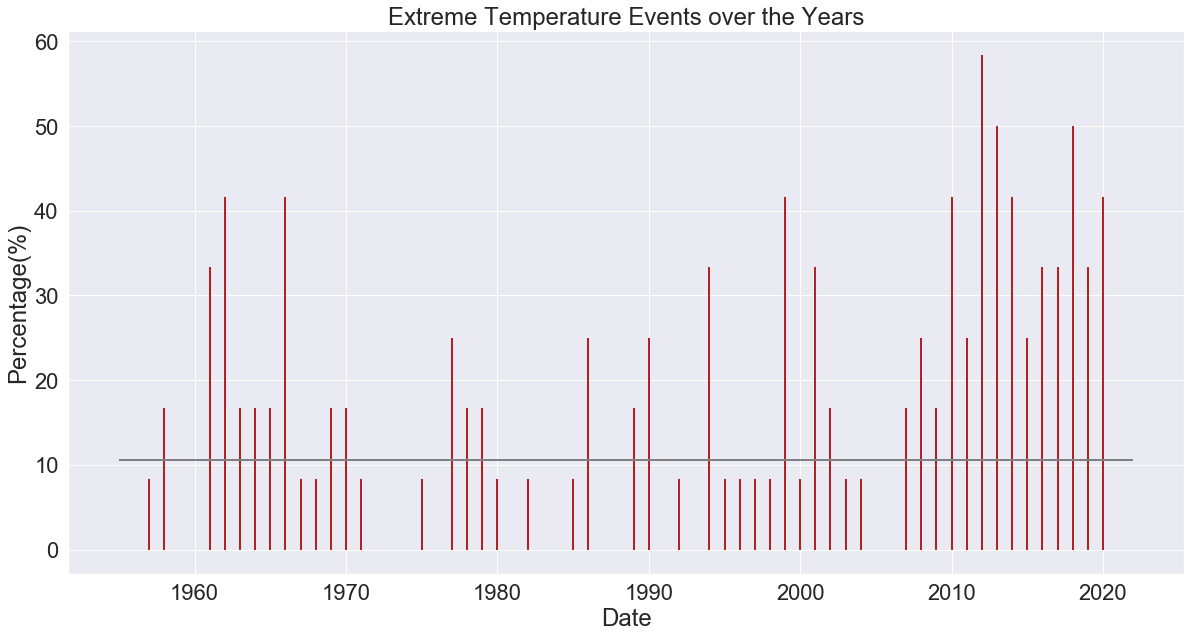

In [95]:
figg = plt.figure(figsize=(20,10))
axes = plt.axes()

x_ = perc_df.index

axes.set_title("Extreme Temperature Events over the Years")
axes.set_xlabel('Date')
axes.set_ylabel('Percentage(%)')

axes.vlines(x=x_, ymin=0, ymax=perc_df[0], color='firebrick', linewidth=2)
axes.hlines(y=perc_baseline.mean(),xmin = 1955,xmax=2022, color='gray', linewidth=2)

💡 Στο παραπάνω διάγραμμα παρατηρούνται ακραία καιρικά φαινόμενα καθ'όλη την διάρκεια των ετών 1955-2020. Παρατηρούμε επίσης κάποια τοπικά μέγιστα στα έτη 1962,1966,1978 κλπ. Τα περισσότερα ακραία καιρικά φαινόμενα βέβαια παρατηρούνται την τελευταία δεκαετία.


# Q5: Precipitation

Στο ερώτημα αυτό θα ασχοληθούμε με την βροχόπτωση κάθε έτους. Συγκεκριμένα θα:

**1)** Βρούμε την συνολική βροχόπτωση κάθε έτους στο διάστημα 1955-2020.

**2)** Βρούμε τον συνολικό αριθμό των βροχερών ημερών κάθε έτους.

**3)** Βρούμε το ratio της συνολικής βροχόπτωσης προς τον συνολικό αριθμό βροχερών ημερών.

**4)** Θα βρούμε τον rolling average του ratio για 10 χρόνια.

### 1) Βρίσκουμε την συνολική βροχόπτωση κάθε έτους στο διάστημα 1955-2020.

📍 Για να βρούμε την συνολική βροχόπτωση για κάθε έτος αποθηκεύουμε τα δεδομένα μας σε ένα καινούργιο DataFrame, το **q5_prcp**, κάνουμε group by year και με την συνάρτηση sum() βρίσκουμε την συνολική βροχόπτωση για κάθε έτος. Αποθηκεύουμε τα δεδομένα μας σε ένα καινούργιο DataFrame το **prcp_total**.

In [96]:
weather_df

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,NaN,18.333333,10.000000
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,NaN,14.444444,7.222222
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,NaN,15.555556,9.444444
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,NaN,18.888889,7.222222
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.000,NaN,16.666667,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.604,NaN,15.000000,18.333333,11.666667
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.000,NaN,16.111111,20.000000,12.222222
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.000,NaN,16.666667,20.000000,15.000000


In [97]:
q5_prcp = weather_df[['DATE', 'PRCP', 'TAVG']]

In [98]:
q5_prcp

,DATE,PRCP,TAVG
0,1955-01-01,0.000,NaN
1,1955-01-02,2.032,NaN
2,1955-01-03,0.000,NaN
3,1955-01-04,0.000,NaN
4,1955-01-05,0.000,NaN
...,...,...,...
23246,2020-12-27,0.000,16.666667
23247,2020-12-28,6.604,15.000000
23248,2020-12-29,0.000,16.111111
23249,2020-12-30,0.000,16.666667


In [99]:
q5_prcp["year"] = pd.DatetimeIndex(q5_prcp['DATE']).year

C:\Users\takis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
q5_prcp

,DATE,PRCP,TAVG,year
0,1955-01-01,0.000,NaN,1955
1,1955-01-02,2.032,NaN,1955
2,1955-01-03,0.000,NaN,1955
3,1955-01-04,0.000,NaN,1955
4,1955-01-05,0.000,NaN,1955
...,...,...,...,...
23246,2020-12-27,0.000,16.666667,2020
23247,2020-12-28,6.604,15.000000,2020
23248,2020-12-29,0.000,16.111111,2020
23249,2020-12-30,0.000,16.666667,2020


In [101]:
prcp_total = q5_prcp.groupby(['year']).sum()['PRCP'].to_frame()


In [102]:
prcp_total

,PRCP
year,
1955,547.370
1956,281.432
1957,302.514
1958,350.266
1959,213.868
...,...
2016,261.332
2017,304.396
2018,380.422


### 2) Βρίσκουμε τον συνολικό αριθμό των βροχερών ημερών κάθε έτους.

📍 Για να βρούμε τον αριθμό των βροχερών ημερών κάθε έτους βρίσκουμε τις θετικές τιμές του PRCP για κάθε έτος και τα αποθηκεύουμε σε ένα καινούργιο DataFrame το **prcp_pos**. Στην συνέχεια με την συνάρτηση count() μετράμε τις τιμές αυτές και τις αποθηκεύουμε σε ένα καινούργιο DataFrame το **count_rainy_days**. 

In [103]:
prcp_pos = q5_prcp.loc[q5_prcp.PRCP>0]

In [104]:
pd.reset_option('display.max_rows', None)
prcp_pos

,DATE,PRCP,TAVG,year
1,1955-01-02,2.032,NaN,1955
8,1955-01-09,3.048,NaN,1955
10,1955-01-11,0.508,NaN,1955
18,1955-01-19,1.524,NaN,1955
19,1955-01-20,5.588,NaN,1955
...,...,...,...,...
23209,2020-11-20,1.016,13.333333,2020
23219,2020-11-30,4.064,15.000000,2020
23223,2020-12-04,5.588,14.444444,2020
23232,2020-12-13,8.890,14.444444,2020


In [105]:
count_rainy_days = prcp_pos.groupby(['year']).count()['PRCP'].to_frame()

In [106]:
count_rainy_days

,PRCP
year,
1955,67
1956,50
1957,66
1958,65
1959,57
...,...
2016,42
2017,48
2018,55


### 3) Βρίσκουμε το ratio της συνολικής βροχόπτωσης προς τον συνολικό αριθμό βροχερών ημερών.

In [107]:
count_rainy_days['ratio'] = prcp_total['PRCP']/count_rainy_days['PRCP']

### 4) Βρίσκουμε τον rolling average του ratio για 10 χρόνια.

In [108]:
count_rainy_days['rolling'] = count_rainy_days['ratio'].rolling(10).mean()

In [109]:
count_rainy_days

,PRCP,ratio,rolling
year,,,
1955,67,8.169701,NaN
1956,50,5.628640,NaN
1957,66,4.583545,NaN
1958,65,5.388708,NaN
1959,57,3.752070,NaN
...,...,...,...
2016,42,6.222190,6.542168
2017,48,6.341583,6.620457
2018,55,6.916764,6.766811


⚡ Μετά τα παραπάνω θα εμφανίσουμε στο διάγραμμα το ratio και το rolling του DataFrame count_rainy_days.

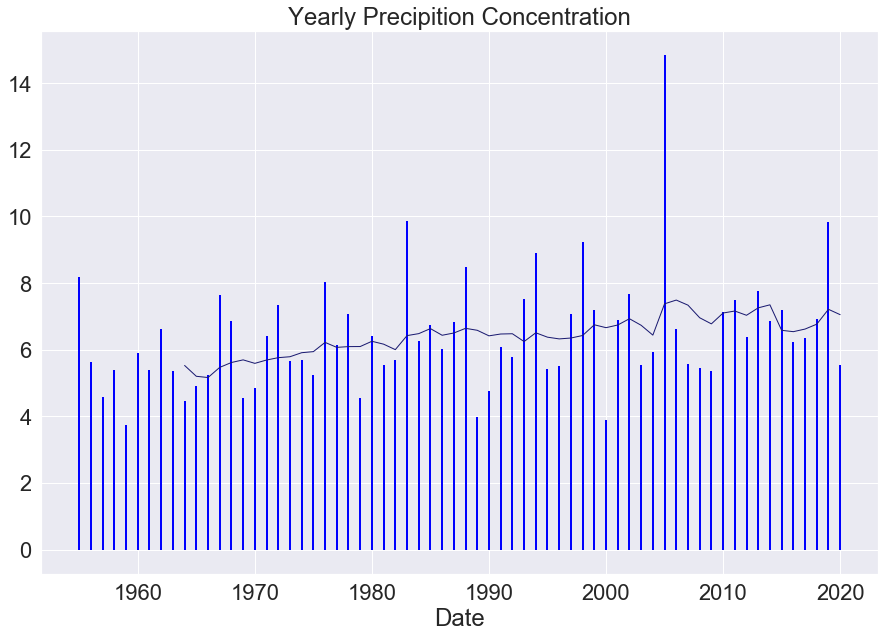

In [110]:

figg = plt.figure(figsize=(15,10))
axes = plt.axes()

x5 = count_rainy_days.index

axes.set_title("Yearly Precipition Concentration")
axes.set_xlabel('Date')


axes.vlines(x=x5, ymin=0, ymax=count_rainy_days['ratio'], color='blue', linewidth=2)
axes.plot(count_rainy_days.index,count_rainy_days['rolling'], color='midnightblue' , linewidth=1)




⚡ Το ratio που υπολογίσαμε μας δείχνει τον τρόπο που κατανείμεται η βροχόπτωση κατά την διάρκεια του κάθε έτους. Μία υψηλή τιμή του ratio αυτού σε σχέση με μία χαμηλότερη τιμή του θα μπορούσε να σημαίνει είτε ότι η ποσότητα της βροχής ήταν πολύ υψηλότερη, είτε ότι οι μέρες που έβρεξε ήταν πολύ λιγότερες. Αν παρατηρήσουμε να δεδομένα μας, βλέπουμε ότι οι βροχερές ημέρες δεν παρουσιάζουν πολύ έντονες διαφορές ανάμεσα στα έτη. Αυτό που αλλάζει με πιο έντονο βαθμό είναι η ποσότητα της βροχής. Πιθανόν, λοιπόν, διαφορές στο διάγραμμα από έτη όπως για παράδειγμα το 1959 με το 2005 οφείλονται στην διαφορά της ποσότητας της βροχόπτωσης. 